In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [22]:
# 1. 生成二分类数据集
X, y = make_classification(
    n_samples=500, # 样本数
    n_features=2, # 特征数
    n_redundant=0, # 冗余特征数
    n_clusters_per_class=1, # 每个类包含的集群数
    class_sep=0.5, # 类别分离度
    flip_y=0.01, # 标签噪声比例
    #random_state=0 # 随机种子
)

In [23]:
X.shape, y.shape # 输出数据集的形状

((500, 2), (500,))

In [24]:
# 2. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [25]:
# 3. 构建并训练神经网络（二分类）
model = MLPClassifier(
    hidden_layer_sizes=(3,),  # 单隐藏层 5 个神经元
    activation='logistic',    # Sigmoid 激活
    solver='sgd',           # 随机梯度下降优化器
    learning_rate_init=0.01, # 初始学习率
    max_iter=2000,         # 最大迭代次数
    random_state=0 # 随机种子
)

In [26]:
model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,),
              learning_rate_init=0.01, max_iter=2000, random_state=0,
              solver='sgd')

In [27]:
# 4. 可视化决策边界 & 测试样本
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
)

In [28]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

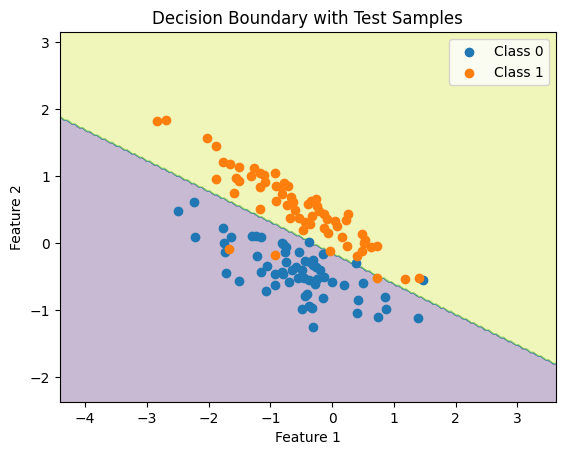

In [29]:
plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
for cls in np.unique(y_test):
    plt.scatter(
        X_test[y_test == cls, 0],
        X_test[y_test == cls, 1],
        label=f'Class {cls}'
    )
plt.title('Decision Boundary with Test Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

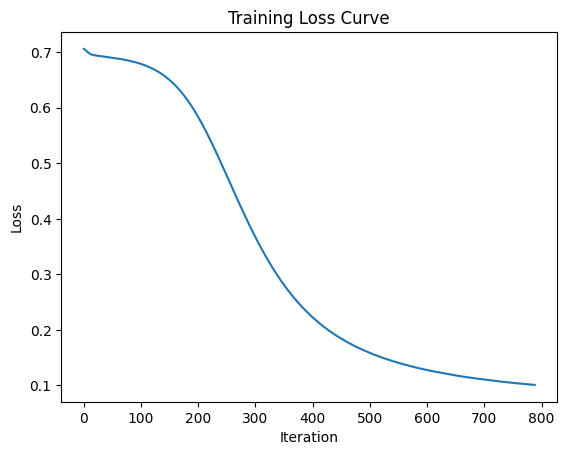

In [30]:
# 5. 绘制训练损失曲线
plt.figure()
plt.plot(model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.show()